In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('weight_height_data.csv')
df.head()

,weight,height
0,50.37,151.29
1,52.23,150.78
2,55.10,161.26
3,57.96,159.74
4,58.83,157.23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  27 non-null     float64
 1   height  27 non-null     float64
dtypes: float64(2)
memory usage: 564.0 bytes


In [9]:
df.describe()

,weight,height
count,27.000000,27.000000
mean,75.186296,172.087778
std,14.469888,11.365050
min,50.370000,150.780000
25%,64.925000,162.620000
50%,74.610000,174.080000
75%,88.230000,180.245000
max,98.850000,192.900000


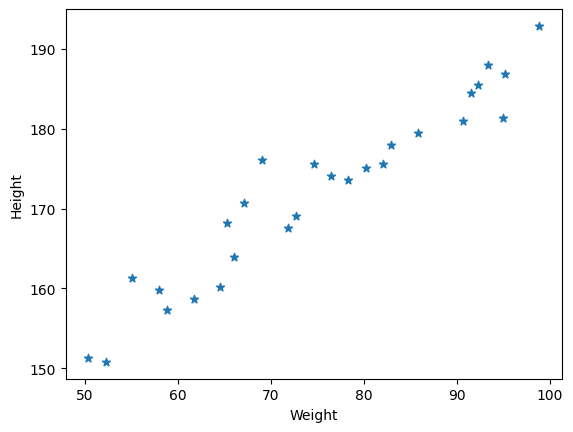

In [5]:
## scatter plot
plt.scatter(df.weight, df.height, marker="*")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [6]:
 # to check the relation between them
df.corr() # in this case they are highly +ve corelated

,weight,height
weight,1.000000,0.960284
height,0.960284,1.000000


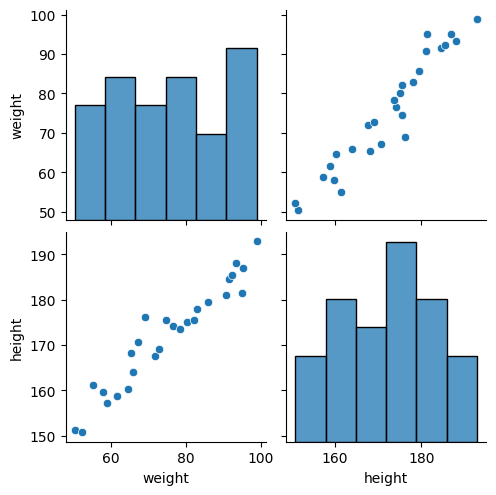

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
x_input = df['weight']
print(type(x_input))
print(x_input)


<class 'pandas.core.series.Series'>
0     50.37
1     52.23
2     55.10
3     57.96
4     58.83
5     61.69
6     64.56
7     65.98
8     65.29
9     67.15
10    69.02
11    71.88
12    72.75
13    74.61
14    76.47
15    78.34
16    80.20
17    82.07
18    82.93
19    85.80
20    90.66
21    91.53
22    93.39
23    92.26
24    95.12
25    94.99
26    98.85
Name: weight, dtype: float64


In [140]:
# during training our machine we want our data in either in 2d array or dataframe not in 1d or series
X = x_input.to_numpy().reshape(-1, 1)
X

array([[50.37],
       [52.23],
       [55.1 ],
       [57.96],
       [58.83],
       [61.69],
       [64.56],
       [65.98],
       [65.29],
       [67.15],
       [69.02],
       [71.88],
       [72.75],
       [74.61],
       [76.47],
       [78.34],
       [80.2 ],
       [82.07],
       [82.93],
       [85.8 ],
       [90.66],
       [91.53],
       [93.39],
       [92.26],
       [95.12],
       [94.99],
       [98.85]])

In [141]:
x_d = df[['weight']]
print(type(x_d))
x_d

<class 'pandas.core.frame.DataFrame'>


,weight
0,50.37
1,52.23
2,55.10
3,57.96
4,58.83
5,61.69
6,64.56
7,65.98
8,65.29
9,67.15


In [142]:
# dependent feature (output can be 1d or series)

y = df['height']
y

0     151.29
1     150.78
2     161.26
3     159.74
4     157.23
5     158.72
6     160.20
7     163.98
8     168.17
9     170.66
10    176.14
11    167.62
12    169.11
13    175.60
14    174.08
15    173.56
16    175.05
17    175.54
18    178.02
19    179.50
20    180.99
21    184.48
22    187.96
23    185.44
24    186.93
25    181.42
26    192.90
Name: height, dtype: float64

In [143]:
## Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [144]:
X_train.shape

(20, 1)

In [ ]:
## Standardization: uses z-score normalizaton
from sklearn.preprocessing import StandardScaler

In [146]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 3.81950969e-01],
       [-2.51462382e-01],
       [ 1.26886559e+00],
       [-1.64605916e+00],
       [-1.19750464e+00],
       [-1.00313101e+00],
       [-1.45100590e+00],
       [ 1.28449703e-01],
       [ 1.15128993e+00],
       [-1.25663228e+00],
       [ 1.26003042e+00],
       [ 1.07449196e+00],
       [ 4.40398982e-01],
       [ 1.52236685e+00],
       [ 9.65751471e-01],
       [-7.11570577e-01],
       [-5.04963647e-01],
       [ 1.35925612e-03],
       [ 6.35452235e-01],
       [-8.08077761e-01]])

In [147]:
# for test data we don't apply fit_transform  :: Data Leakage
X_test = scaler.transform(X_test) # we want to use same mean and standard deviation as of X_train that's why we use transform 
X_test

array([[-0.75846491],
       [-0.12505156],
       [-0.63205409],
       [ 1.02487911],
       [-1.77246998],
       [-0.31059002],
       [ 0.25486052]])

In [148]:
# Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [149]:
regression = LinearRegression()

In [150]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [151]:
print("Coefficent or slope", regression.coef_ )  # for one unit movement on x, there will be movement of 11 on y_axis.

Coefficent or slope [11.19539475]


In [152]:
regression.intercept_ # at which point our line is meeting y-axis means x is zero.  

np.float64(172.67499999999998)

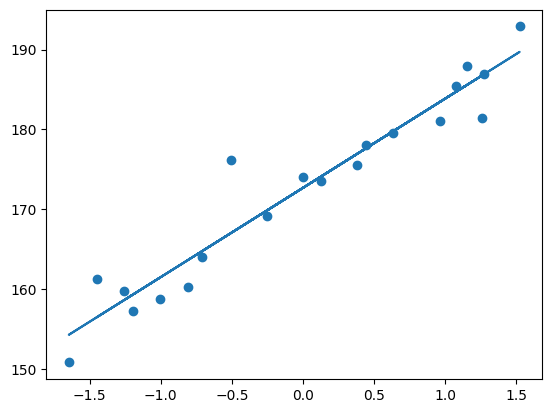

In [153]:
# plot Training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

### Prediction of test data
1. prediction height output = intercept + coef_(weight)
2. y_hat_test = 172.675 + 11.195(X_test)

In [156]:
## prediction for test data
y_hat_test  = regression.predict(X_test)
print(y_hat_test)

[164.18368589 171.27499839 165.59890491 184.14892623 152.83149893
 169.19782209 175.52826415]


In [157]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [158]:
mse = mean_squared_error(y_test, y_hat_test)
mae = mean_absolute_error(y_test, y_hat_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

9.345015790882098
2.471581392093323
3.0569618563014647


## R Square

Formula:

**R² = 1-SSR/SST**

R² = coefficient of determination, SSR = sum of squraes of residual, SST = total sum of squares total

In [159]:
from sklearn.metrics import r2_score

In [161]:
score = r2_score(y_test, y_hat_test)
print(score)

0.8953139144381341


#### Adjusted R2 = 1-[(1-r2)*(n-1)/(n-k-1)]

In [162]:
# display adjusted R_squared
1 - (1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1] - 1)

0.874376697325761

##

## OLS Linear Regression

In [166]:
import statsmodels.api as sm

In [167]:
model = sm.OLS(y_train, X_train).fit()

In [168]:
prediction = model.predict(X_test)
print(prediction)

[ -8.49131411  -1.40000161  -7.07609509  11.47392623 -19.84350107
  -3.47717791   2.85326415]


In [169]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.048
Method:                 Least Squares   F-statistic:                            0.07984
Date:                Tue, 08 Jul 2025   Prob (F-statistic):                       0.781
Time:                        18:27:42   Log-Likelihood:                         -131.41
No. Observations:                  20   AIC:                                      264.8
Df Residuals:                      19   BIC:                                      265.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [171]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

array([169.28912654])